# Community Detection based on Dijkstra Shortest Path Algorithm


__START__: [20P]Import Data from [moviegalaxies.com/Babel](http://moviegalaxies.com/movies/download/92/Babel)

__REPEAT__ 10 times:
 - [10P]Find shortest path between two nodes [Dijkstra Algorithm (https://algs4.cs.princeton.edu/lectures/44DemoDijkstra.pdf)
  - using [textbooks java code](https://algs4.cs.princeton.edu/code/)
 - [10P]Using previous code, find shortest path between every pair in G
 - [40P]For every edge, count the number of shortest paths passing through that edge.
  - Use symbol table to map each edge to number of shortest paths passing through that edge
 - [20P]Find and remove the edge on which max number of shortest paths pass

__Not__: For this term project you are only allowed to use our [textbooks java code](https://algs4.cs.princeton.edu/code/).



In [2]:
# import Necessary Libraries
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from heapq import *

def my_dijkstra(G, s, t):  
    """Write Lazy Dijkstra Algorithm"""
    pq, edgeTo, distTo = [], dict(), {n:float("inf") for n in G.nodes()}
    # initially distance to every vertex is +inf, except source vertex s
    distTo[s] = 0
    heappush(pq, (distTo[s], s)) # Add vertex v to priority queue with priority distTo[v]
    while pq: # while queue is not empty
        cost, v1 = heappop(pq) # pop a vertex
        if v1 == t: return (cost, edgeTo) # if target is reached stop
        for v2 in list(G.neighbors(v1)) : # if not, relax every edge to all neighbors
            c = int(G[v1][v2]['weight'])
            if cost+c < distTo[v2]:
                distTo[v2] = cost+c # Edge relaxation
                heappush(pq, (distTo[v2], v2))
                edgeTo[v2] = v1 # store from where you come to v3

    return (float("inf"), edgeTo)

def getPathFromEdgeTo(s, t, edgeTo):
    """Return path from dictionary edgeTo"""
    path = []
    while t != s: # start from target node
        path.append(t)
        t = edgeTo[t] # go backwards until source 
    path.append(t)
    return list(reversed(path))


def findAllShortestPaths(G, display = False):
    """ Find all shortest paths among every pair of nodes"""
    sp = dict()
    for s in G.nodes():
        for t in G.nodes():
            if s != t:
                cost, edgeTo = my_dijkstra(G, s, t)
                if cost != float("inf"):
                    path = getPathFromEdgeTo(s, t, edgeTo)
                    sp[(s,t)] = (path, cost)
                else:
                    if display: print("INF (No Way Out): ", s, t)
    return sp


def getEdgesFromPath(path):
    """Return list of edges existing on the path"""
    return list(zip(path[:-1], path[1:]))


def numberOfShortestPaths_PassingThroughEdges(G):
    """Map each edge to number of shortest paths passing through that edge"""
    sp = findAllShortestPaths(G)
    onsp =dict()
    for path, cost in sp.values():
        for edges in getEdgesFromPath(path):
            if edges in onsp: 
                onsp[edges] += 1
            else:
                onsp[edges] = 1
    return onsp


def getEdgeWithMaxSP(G):
    """Retrieve -edge with max SP number-
                -edge on which max number of shortest paths pass-"""
    onsp = numberOfShortestPaths_PassingThroughEdges(G)
    return max(onsp, key=lambda i: onsp[i])

def removeMax(G):
    """Remove edge with max SP number"""
    e = getEdgeWithMaxSP(G)
    G.remove_edge(*e)
    return G


def draw(G):
    """Draw Graph"""
    plt.figure(figsize=(12,12))
    B = list(nx.betweenness_centrality(G).values())
    nx.draw(G, node_size=B,
            alpha = 0.7,
            node_color = B,
            cmap = plt.cm.Blues,
            with_labels=True)

## Film Babel
![Babel Film](https://img03.imgsinemalar.com/images/afis_buyuk/b/Babil-1294695025.jpg)

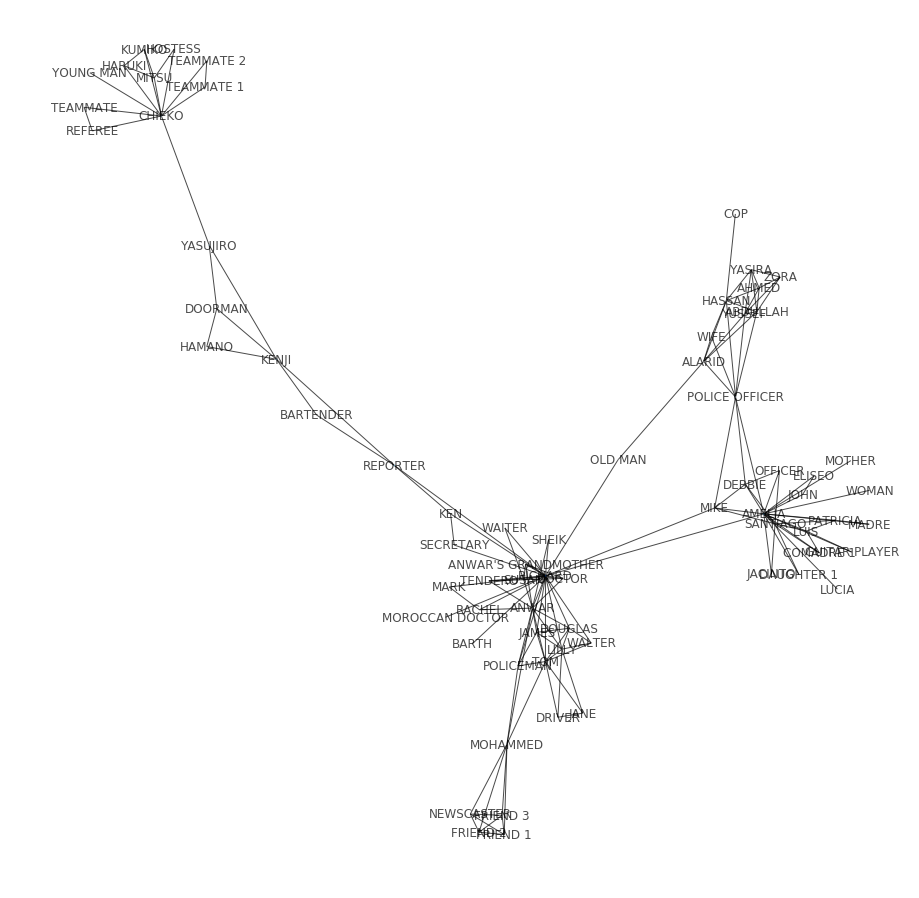

In [13]:
# Import Data
G =nx.read_gexf("babel.gexf", relabel= True)
draw(G)

# Community Detection

repeat 10 times:
 - find and remove the edge with max SP number

1  th Removal (Remove edge with max SP number)


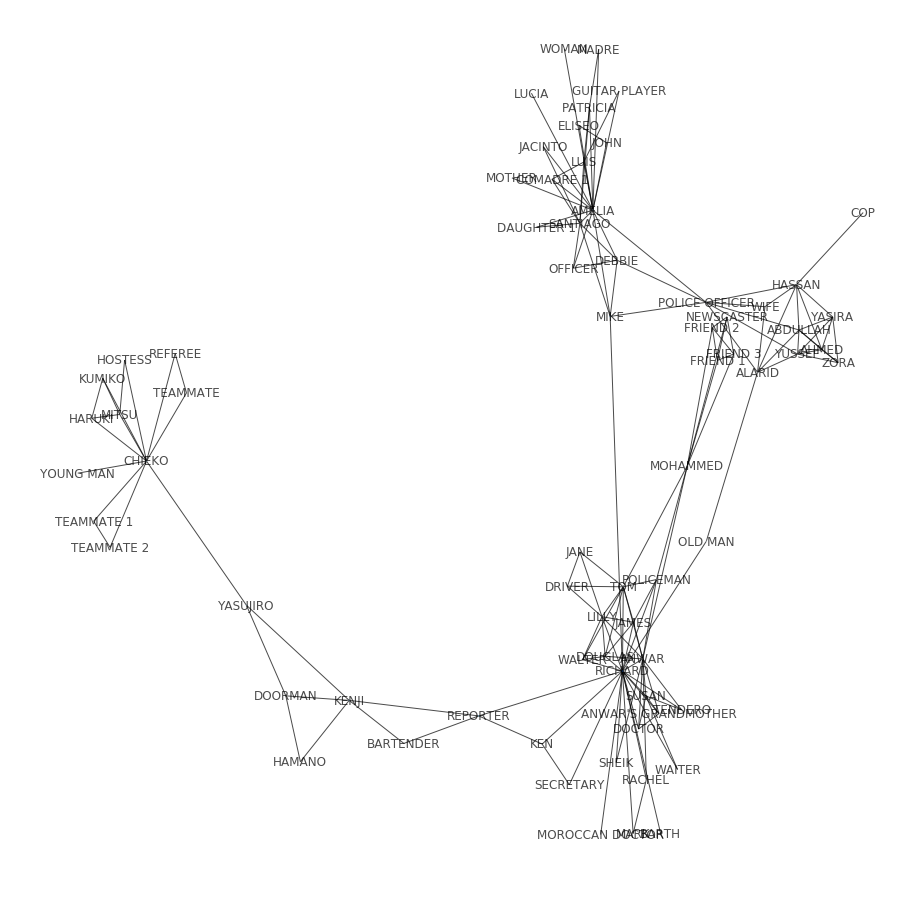

In [4]:
i = 1
print(i, " th Removal (Remove edge with max SP number)")
G = removeMax(G)
draw(G)

2  th Removal (Remove edge with max SP number)


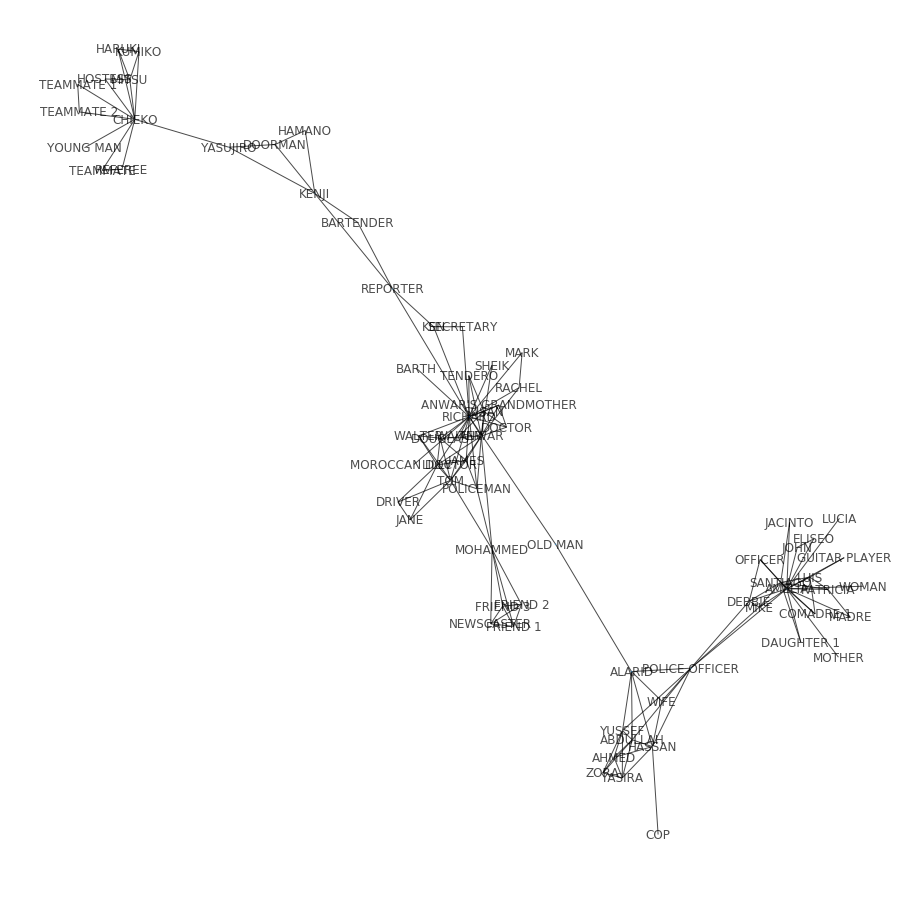

In [5]:
i += 1
print(i, " th Removal (Remove edge with max SP number)")
G = removeMax(G)
draw(G)

3  th Removal (Remove edge with max SP number)


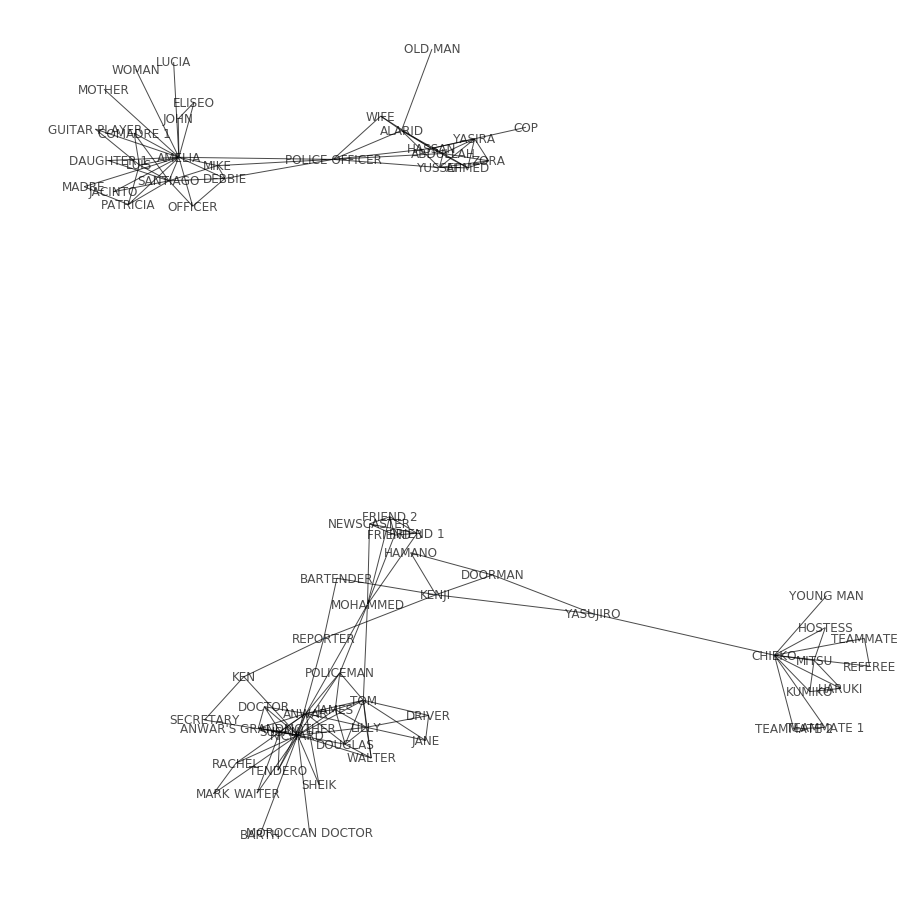

In [6]:
i += 1
print(i, " th Removal (Remove edge with max SP number)")
G = removeMax(G)
draw(G)

4  th Removal (Remove edge with max SP number)


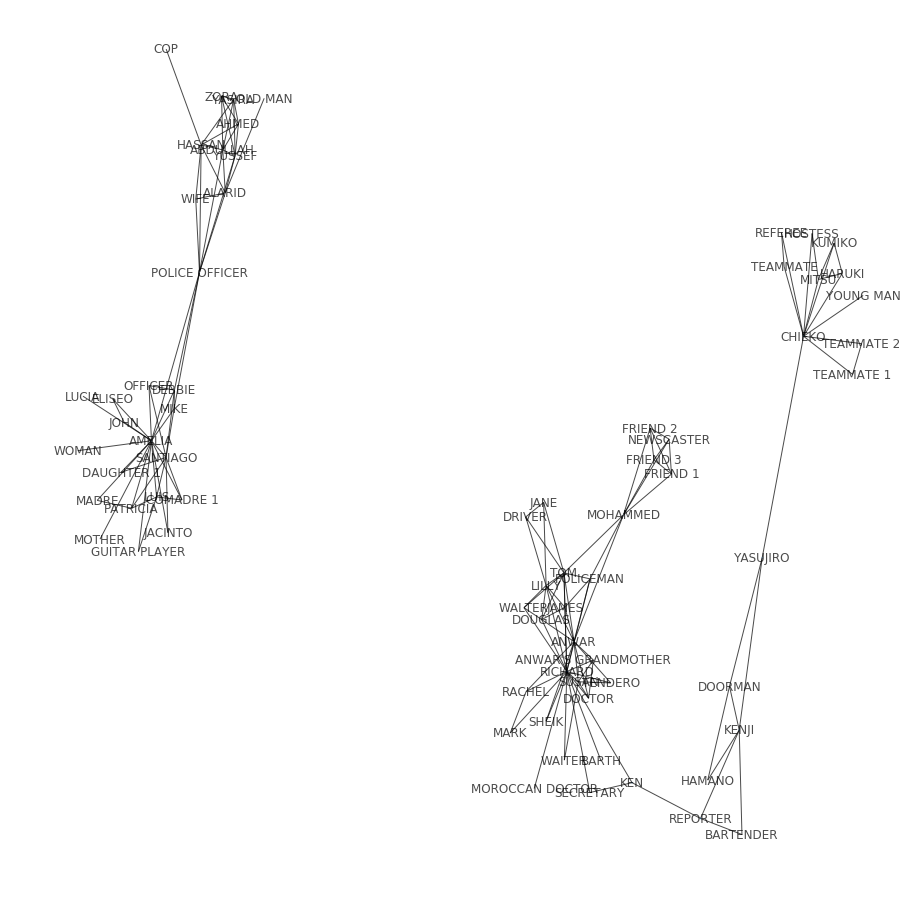

In [7]:
i += 1
print(i, " th Removal (Remove edge with max SP number)")
G = removeMax(G)
draw(G)

5  th Removal (Remove edge with max SP number)


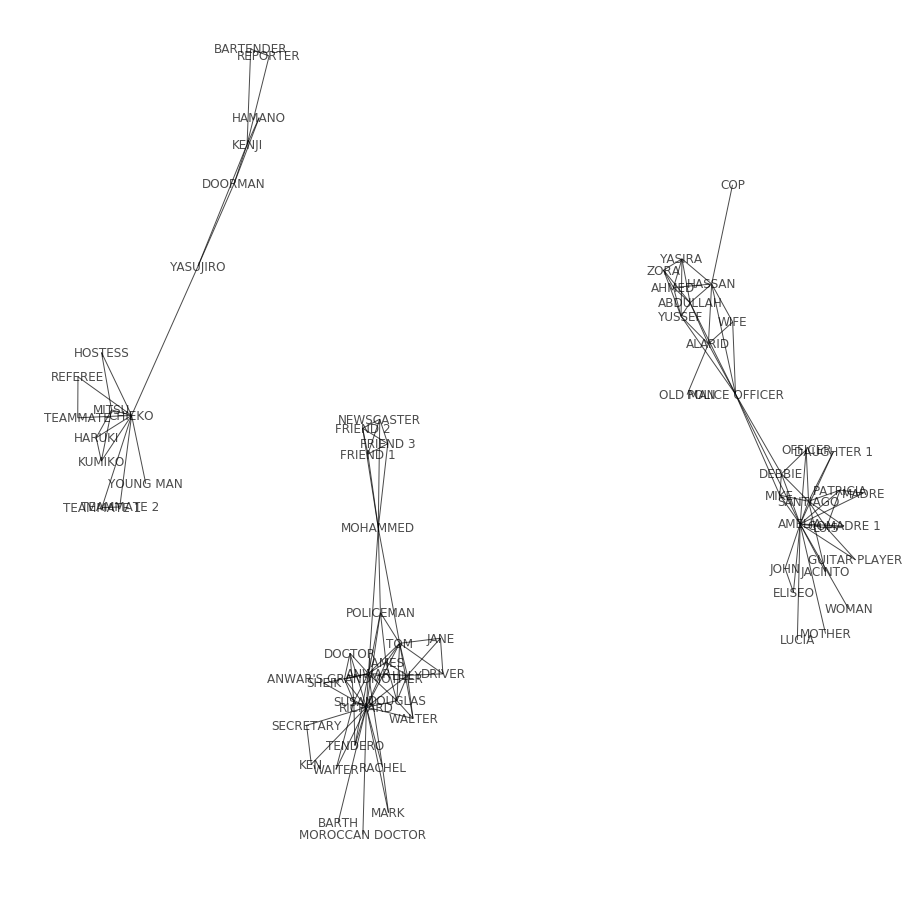

In [8]:
i += 1
print(i, " th Removal (Remove edge with max SP number)")
G = removeMax(G)
draw(G)

6  th Removal (Remove edge with max SP number)


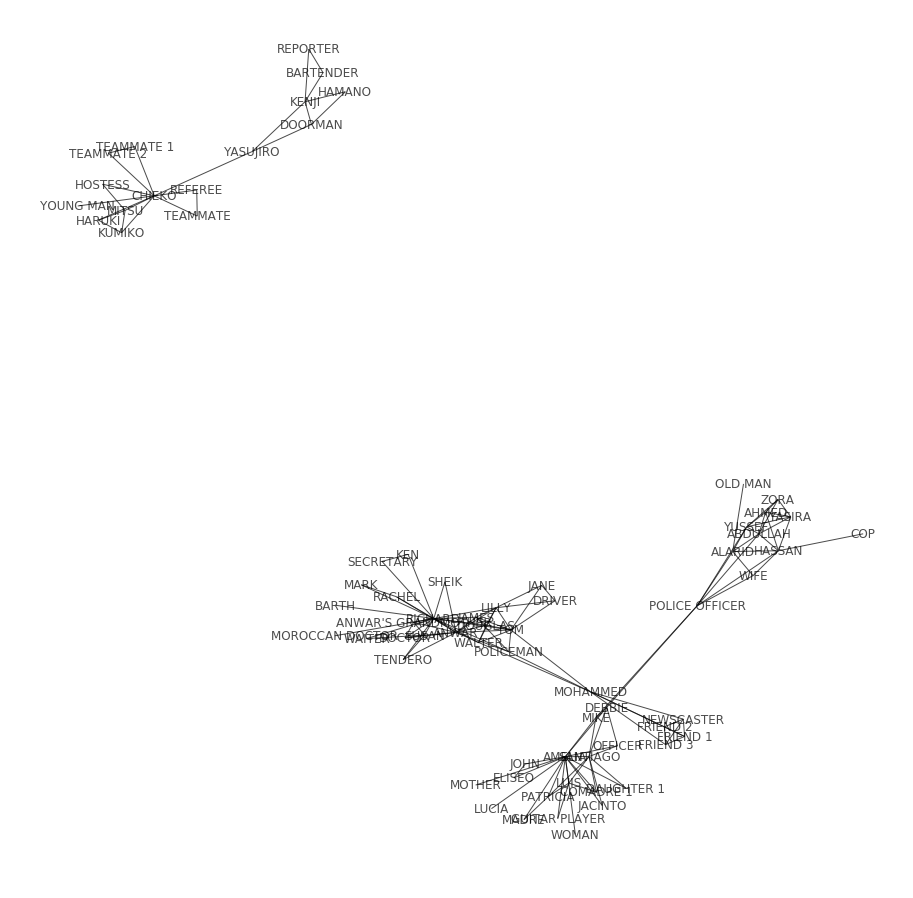

In [9]:
i += 1
print(i, " th Removal (Remove edge with max SP number)")
G = removeMax(G)
draw(G)

7  th Removal (Remove edge with max SP number)


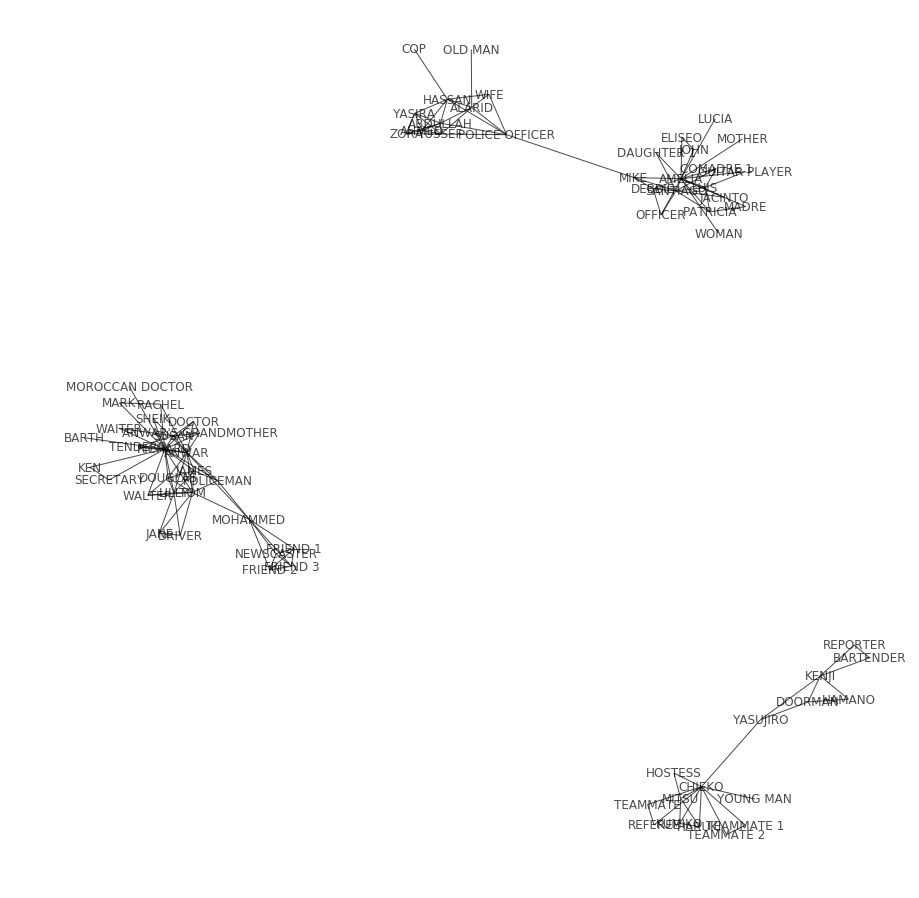

In [10]:
i += 1
print(i, " th Removal (Remove edge with max SP number)")
G = removeMax(G)
draw(G)

8  th Removal (Remove edge with max SP number)


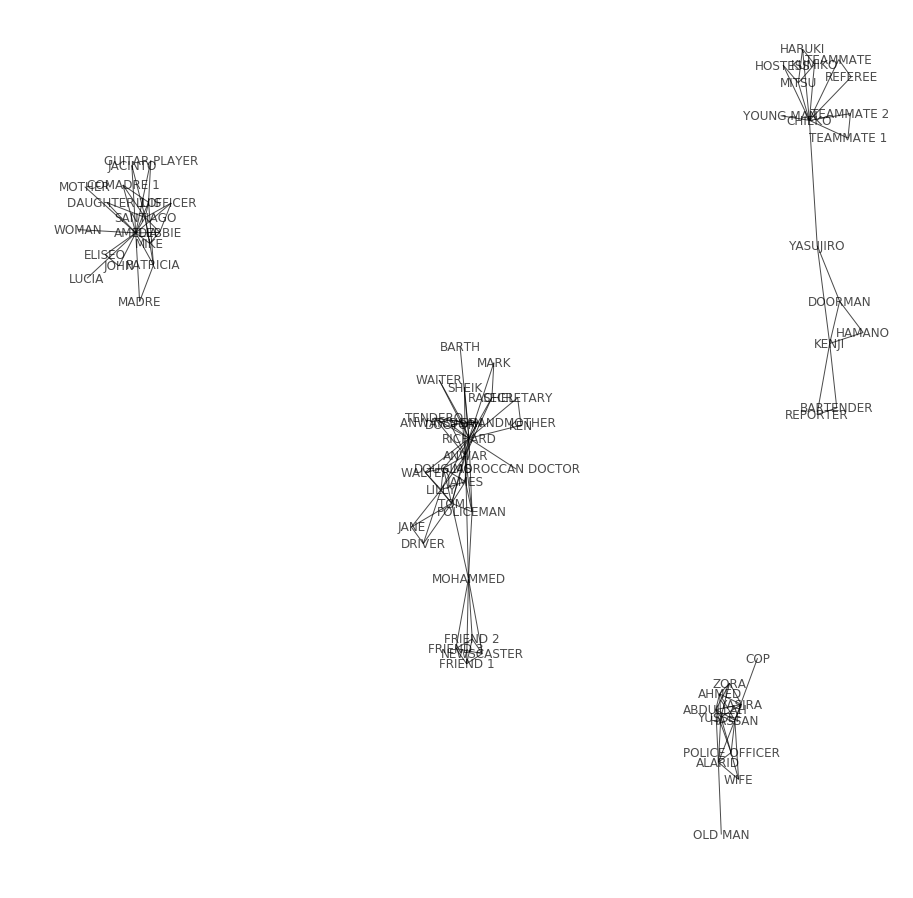

In [11]:
i += 1
print(i, " th Removal (Remove edge with max SP number)")
G = removeMax(G)
draw(G)

9  th Removal (Remove edge with max SP number)


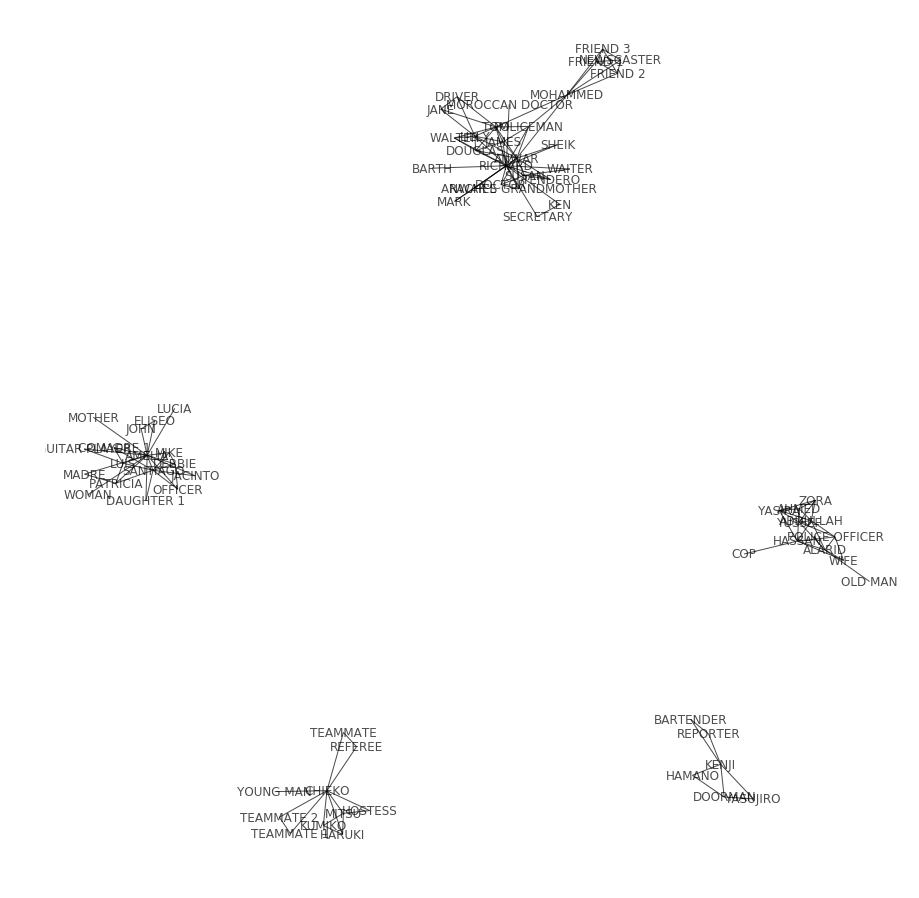

In [12]:
i += 1
print(i, " th Removal (Remove edge with max SP number)")
G = removeMax(G)
draw(G)

# RESULT
10 communities are found!!